In [62]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

import re
import os
import math
import requests
import yaml
import json

In [54]:
c1_decision_summary

,decision,count,proportion
0,remote,389,0.845652
1,field,36,0.078261
2,review required,35,0.076087


In [63]:
df = pd.read_csv(f'../data/c1_dtree_baseline_042425.csv')
prj_names = pd.read_csv(f'../terrafund_approved_projects_202504021529.csv')
csv = '../bef_shortlist_c1.csv'

shortlist = pd.read_csv(csv)
shortlist = shortlist[['poly_id', 'project_id', 'pct_img_cover_base','pct_img_cover_ev', 'pct_img_cover_both']] 
df.shape, shortlist.shape

((460, 19), (467, 5))

In [65]:
shortlist.project_id.nunique()

12

In [66]:
prj_names.project_id.nunique()

156

In [36]:
len(set(list(df.project_id))), len(set(list(shortlist.project_id)))

(12, 12)

In [4]:
# looks like 7 rows were dropped during the decision tree run
unmatched = shortlist[~shortlist['poly_id'].isin(df['poly_id'])]
unmatched

,poly_id,project_id,pct_img_cover_base,pct_img_cover_ev,pct_img_cover_both
121,3c1b15ff-2112-4f59-a9c9-2b388bca2b74,8cbda7fc-aa17-444b-8425-7047fade708c,0.0,100.0,0.0
122,61d74a81-2a0c-4990-8ed2-70b564fbe032,8cbda7fc-aa17-444b-8425-7047fade708c,0.0,100.0,0.0
123,99e54612-17ee-49d5-aa02-b8005b4f1aac,8cbda7fc-aa17-444b-8425-7047fade708c,0.0,100.0,0.0
124,cf1e6b41-bc9e-4e9b-b80a-5603cc07b8f0,8cbda7fc-aa17-444b-8425-7047fade708c,0.0,100.0,0.0
125,31bf2bc4-dfb8-4d1f-aed0-dc4cbbb5ad2e,8cbda7fc-aa17-444b-8425-7047fade708c,0.0,100.0,0.0
126,e3917d9a-382e-497d-93b2-67c6b714b2c1,8cbda7fc-aa17-444b-8425-7047fade708c,0.0,100.0,0.0
131,8a3c5e4b-0990-4353-a33d-f4d1056b15b4,8cbda7fc-aa17-444b-8425-7047fade708c,0.0,100.0,0.0
132,6ae9eec7-f989-4b26-b5e1-343ac41c2998,8cbda7fc-aa17-444b-8425-7047fade708c,0.0,100.0,0.0
133,4cda79fe-f919-47e4-83b5-64a9504d71aa,8cbda7fc-aa17-444b-8425-7047fade708c,0.0,100.0,0.0


In [7]:
mrg = df.merge(shortlist, on='poly_id', how='outer', indicator=True)
mrg.shape

(469, 24)

In [9]:
mrg._merge.value_counts()

_merge
both          458
right_only      9
left_only       2
Name: count, dtype: int64

In [10]:
# same project as above w/ no decision, going to ignore
errs = mrg[mrg._merge == "left_only"]
errs

,project_id_x,poly_id,site_id,geometry,plantstart,plantend,practice,target_sys,dist,project_phase,...,ev_img_count,plantstart_year,baseline_canopy,ev_canopy,decision,project_id_y,pct_img_cover_base,pct_img_cover_ev,pct_img_cover_both,_merge
221,8cbda7fc-aa17-444b-8425-7047fade708c,6d2f9e23-3d2f-47e9-aa89-0b658606f02c,832e2eb9-e2e3-43b2-8d7c-b521b2608688,"{'type': 'Polygon', 'coordinates': [[[34.59405...",2022-11-01,NaN,assisted-natural-regeneration,agroforest,NaN,NaN,...,1.0,2022.0,invalid,invalid,review required,NaN,NaN,NaN,NaN,left_only
229,8cbda7fc-aa17-444b-8425-7047fade708c,712082e6-c3b2-44f5-9ef8-ee317408813b,832e2eb9-e2e3-43b2-8d7c-b521b2608688,"{'type': 'Polygon', 'coordinates': [[[34.59257...",2023-04-01,NaN,assisted-natural-regeneration,agroforest,NaN,NaN,...,1.0,2023.0,invalid,invalid,review required,NaN,NaN,NaN,NaN,left_only


In [12]:
mrg.columns

Index(['project_id_x', 'poly_id', 'site_id', 'geometry', 'plantstart',
       'plantend', 'practice', 'target_sys', 'dist', 'project_phase',
       'ttc_2022', 'ttc_2021', 'ttc_2023', 'baseline_img_count',
       'ev_img_count', 'plantstart_year', 'baseline_canopy', 'ev_canopy',
       'decision', 'project_id_y', 'pct_img_cover_base', 'pct_img_cover_ev',
       'pct_img_cover_both', '_merge'],
      dtype='object')

In [16]:
mrg.to_csv('../data/results/bef_shortlist_dtree.csv')

In [24]:
mrg.columns

Index(['project_id_x', 'poly_id', 'site_id', 'geometry', 'plantstart',
       'plantend', 'practice', 'target_sys', 'dist', 'project_phase',
       'ttc_2022', 'ttc_2021', 'ttc_2023', 'baseline_img_count',
       'ev_img_count', 'plantstart_year', 'baseline_canopy', 'ev_canopy',
       'decision', 'project_id_y', 'pct_img_cover_base', 'pct_img_cover_ev',
       'pct_img_cover_both', '_merge'],
      dtype='object')

In [25]:
mrg = mrg[['project_id_x', 'poly_id', 'plantstart','practice', 'target_sys', 'dist','ttc_2022', 'ttc_2021', 'ttc_2023', 'baseline_img_count',
       'ev_img_count','baseline_canopy', 'ev_canopy',
       'decision','pct_img_cover_base', 'pct_img_cover_ev',
       'pct_img_cover_both']]

In [26]:
mrg.head()

,project_id_x,poly_id,plantstart,practice,target_sys,dist,ttc_2022,ttc_2021,ttc_2023,baseline_img_count,ev_img_count,baseline_canopy,ev_canopy,decision,pct_img_cover_base,pct_img_cover_ev,pct_img_cover_both
0,c3d2858f-aa3d-458e-8e88-5a7f376e6ef4,000aa608-f5fe-4a9f-b3bb-ee5785b285b5,2022-07-17,tree-planting,agroforest,NaN,NaN,22.0,NaN,1.0,1.0,open,investigate,remote,100.0,100.0,100.0
1,a8940698-ff28-456c-b8cd-f7289e612913,007a94ae-f78c-4734-b6fe-e3466eeaa72c,2022-08-27,tree-planting,agroforest,NaN,NaN,29.0,NaN,2.0,0.0,open,investigate,remote,100.0,100.0,100.0
2,a8940698-ff28-456c-b8cd-f7289e612913,00edff2f-99a0-447f-a9b1-73a38b224844,2022-08-27,tree-planting,agroforest,NaN,NaN,15.0,NaN,1.0,2.0,open,investigate,remote,100.0,100.0,100.0
3,a8940698-ff28-456c-b8cd-f7289e612913,0163d43a-2e2e-42f7-9f30-369d9afe2820,2022-08-26,tree-planting,agroforest,NaN,NaN,5.0,NaN,1.0,0.0,open,investigate,remote,100.0,100.0,100.0
4,a8940698-ff28-456c-b8cd-f7289e612913,0254308f-ab9b-465c-8045-9c25aa49fe5d,2022-08-27,tree-planting,agroforest,NaN,NaN,2.0,NaN,3.0,0.0,open,investigate,remote,100.0,100.0,100.0


## Verification method by prj

In [45]:
list(total_counts.project_id_x)

['01918b25-6544-4027-82aa-6703c7c04784',
 '292bbbda-ec32-40e2-a127-3670a052423d',
 '33274073-8a4e-4eca-8b97-0e8da3833105',
 '3a860077-df4c-4e95-8fec-41520c551243',
 '53f9f5a6-9346-436c-87bb-b5cc86d978c0',
 '6ca7c7b3-9109-4f34-8dc5-a64f8c7d558f',
 '71706fe4-0e80-4552-8be2-d6f6a55e13d2',
 '8cbda7fc-aa17-444b-8425-7047fade708c',
 'a8940698-ff28-456c-b8cd-f7289e612913',
 'c3d2858f-aa3d-458e-8e88-5a7f376e6ef4',
 'cf106374-3dd4-401d-80ba-25b70247381a',
 'cf16b937-a02b-4691-b816-28669ec348f2']

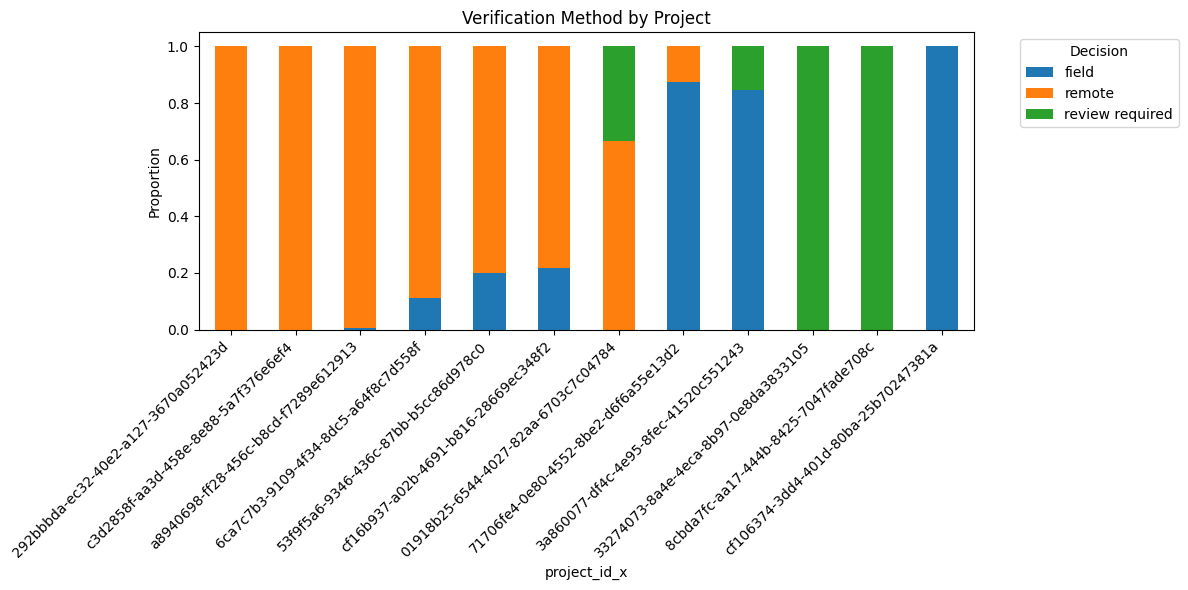

In [21]:

# Calculate total decisions and polygons per project for proportion
decision_counts = mrg.groupby(['project_id_x', 'decision'])['poly_id'].count().reset_index()
decision_counts.rename(columns={'poly_id': 'count'}, inplace=True)

total_counts = mrg.groupby('project_id_x')['poly_id'].count().reset_index()
total_counts.rename(columns={'poly_id': 'total'}, inplace=True)

# Merge and compute proportions
merged = pd.merge(decision_counts, total_counts, on='project_id_x')
merged['proportion'] = merged['count'] / merged['total']

# Pivot for easier plotting
pivot_df = merged.pivot(index='project_id_x', columns='decision', values='proportion').fillna(0)

# Sort by highest remote proportion
pivot_df = pivot_df.sort_values(by='remote', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)
plt.ylabel('Proportion')
plt.title('Verification Method by Project')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [22]:
pivot_df

decision,field,remote,review required
project_id_x,,,
292bbbda-ec32-40e2-a127-3670a052423d,0.000000,1.000000,0.000000
c3d2858f-aa3d-458e-8e88-5a7f376e6ef4,0.000000,1.000000,0.000000
a8940698-ff28-456c-b8cd-f7289e612913,0.006897,0.993103,0.000000
6ca7c7b3-9109-4f34-8dc5-a64f8c7d558f,0.111111,0.888889,0.000000
53f9f5a6-9346-436c-87bb-b5cc86d978c0,0.200000,0.800000,0.000000
cf16b937-a02b-4691-b816-28669ec348f2,0.217391,0.782609,0.000000
01918b25-6544-4027-82aa-6703c7c04784,0.000000,0.666667,0.333333
71706fe4-0e80-4552-8be2-d6f6a55e13d2,0.875000,0.125000,0.000000
3a860077-df4c-4e95-8fec-41520c551243,0.846154,0.000000,0.153846


In [47]:
prj_id = 'cf16b937-a02b-4691-b816-28669ec348f2'
rev = mrg[mrg.project_id_x == prj_id]
rev

,project_id_x,poly_id,plantstart,practice,target_sys,dist,ttc_2022,ttc_2021,ttc_2023,baseline_img_count,ev_img_count,baseline_canopy,ev_canopy,decision,pct_img_cover_base,pct_img_cover_ev,pct_img_cover_both
12,cf16b937-a02b-4691-b816-28669ec348f2,06b74e07-ee07-4bc9-b066-d10133824f14,2022-01-04,tree-planting,agroforest,NaN,NaN,43.0,NaN,1.0,0.0,closed,investigate,remote,100.000000,100.0,100.000000
15,cf16b937-a02b-4691-b816-28669ec348f2,0783c834-7eb2-4c54-a8e4-ae405c1e0d14,2022-01-04,tree-planting,agroforest,NaN,NaN,14.0,NaN,0.0,0.0,open,investigate,field,0.000000,100.0,0.000000
117,cf16b937-a02b-4691-b816-28669ec348f2,3ad95c9f-00e7-4f6d-926c-17a7d40ab672,2022-01-04,tree-planting,agroforest,NaN,NaN,13.0,NaN,1.0,0.0,open,investigate,remote,100.000000,100.0,100.000000
137,cf16b937-a02b-4691-b816-28669ec348f2,46eebe18-cccd-4e4c-affb-3991e947102c,2022-01-04,tree-planting,agroforest,NaN,NaN,11.0,NaN,0.0,0.0,open,investigate,field,0.000000,100.0,0.000000
153,cf16b937-a02b-4691-b816-28669ec348f2,4c96633a-6209-43df-a378-c403eee5a511,2022-01-04,tree-planting,agroforest,NaN,NaN,6.0,NaN,0.0,0.0,open,investigate,field,0.000000,100.0,0.000000
159,cf16b937-a02b-4691-b816-28669ec348f2,4ef13b89-148b-45a8-8d2c-4b48f4d06e73,2022-01-04,tree-planting,agroforest,NaN,NaN,2.0,NaN,1.0,0.0,open,investigate,remote,0.000000,100.0,0.000000
196,cf16b937-a02b-4691-b816-28669ec348f2,5f1dc079-e5c6-4f45-83df-2f6e28a8a142,2022-04-04,tree-planting,agroforest,NaN,NaN,0.0,NaN,1.0,0.0,open,investigate,remote,0.000000,100.0,0.000000
216,cf16b937-a02b-4691-b816-28669ec348f2,69ef8c6c-6a73-4b17-a436-c5b7d030e01e,2022-01-04,tree-planting,agroforest,NaN,NaN,27.0,NaN,1.0,0.0,open,investigate,remote,0.000000,100.0,0.000000
228,cf16b937-a02b-4691-b816-28669ec348f2,70fcfc6c-748f-47a2-8144-5b49933e57c4,2022-03-28,tree-planting,agroforest,NaN,NaN,0.0,NaN,1.0,0.0,open,investigate,remote,100.000000,100.0,100.000000
255,cf16b937-a02b-4691-b816-28669ec348f2,80b2c387-37f0-40c8-9565-34b607e927ea,2022-01-04,tree-planting,agroforest,NaN,NaN,66.0,NaN,1.0,0.0,closed,investigate,remote,0.000000,100.0,0.000000


## 7

In [37]:
# not sure why first row needs review but this one should be all remote
prj_id = '01918b25-6544-4027-82aa-6703c7c04784'
rev = mrg[mrg.project_id_x == prj_id]
rev

,project_id_x,poly_id,plantstart,practice,target_sys,dist,ttc_2022,ttc_2021,ttc_2023,baseline_img_count,ev_img_count,baseline_canopy,ev_canopy,decision,pct_img_cover_base,pct_img_cover_ev,pct_img_cover_both
8,01918b25-6544-4027-82aa-6703c7c04784,04f2821e-54f3-4a5a-ab57-2eea5c927df1,2022-07-15,tree-planting,riparian-area-or-wetland,partial,NaN,61.0,NaN,11.0,0.0,closed,investigate,review required,100.0,0.2451,0.2451
352,01918b25-6544-4027-82aa-6703c7c04784,bb064fa6-c72c-4768-a1cb-4bc55a0c32f8,2022-07-15,tree-planting,riparian-area-or-wetland,partial,NaN,27.0,NaN,12.0,0.0,open,investigate,remote,100.0,100.0000,100.0000
413,01918b25-6544-4027-82aa-6703c7c04784,e15e410f-7261-43fe-a76d-b2d409e22fe6,2022-07-15,tree-planting,riparian-area-or-wetland,partial,NaN,38.0,NaN,9.0,0.0,open,investigate,remote,100.0,100.0000,100.0000


## 8 
This has v low img availability - only 100% cover_both for 2 polygons, so makes sense 90% is assigned to field
## 9 
This is the mangrove

In [42]:
# prj_id = '71706fe4-0e80-4552-8be2-d6f6a55e13d2'
# rev = mrg[mrg.project_id_x == prj_id]
# rev

# prj_id = '3a860077-df4c-4e95-8fec-41520c551243'
# rev = mrg[mrg.project_id_x == prj_id]
# rev

## 10

In [32]:
# the review required decision means that the polygon did not meet the criteria in the rules template

# for this example its bc there's multiple practices - but this is ANR in closed canopy so would assign to field
prj_id = '33274073-8a4e-4eca-8b97-0e8da3833105'
rev = mrg[mrg.project_id_x == prj_id]
print(rev.practice.value_counts())
rev

practice
assisted-natural-regeneration,tree-planting    8
Name: count, dtype: int64


,project_id_x,poly_id,plantstart,practice,target_sys,dist,ttc_2022,ttc_2021,ttc_2023,baseline_img_count,ev_img_count,baseline_canopy,ev_canopy,decision,pct_img_cover_base,pct_img_cover_ev,pct_img_cover_both
141,33274073-8a4e-4eca-8b97-0e8da3833105,48d426c0-2d47-4938-a97f-1d3d60361419,2022-09-21,"assisted-natural-regeneration,tree-planting",natural-forest,NaN,NaN,57.0,NaN,3.0,2.0,closed,investigate,review required,100.000000,100.0,100.000000
224,33274073-8a4e-4eca-8b97-0e8da3833105,6dd071df-6c8d-405d-861e-f76dab774c2b,2022-10-10,"assisted-natural-regeneration,tree-planting",natural-forest,NaN,NaN,39.0,NaN,3.0,2.0,open,investigate,review required,100.000000,100.0,100.000000
281,33274073-8a4e-4eca-8b97-0e8da3833105,8ed3f41c-049c-4364-932d-03611d624d62,2022-10-20,"assisted-natural-regeneration,tree-planting",natural-forest,NaN,NaN,89.0,NaN,2.0,3.0,closed,investigate,review required,100.000000,100.0,100.000000
286,33274073-8a4e-4eca-8b97-0e8da3833105,93986eeb-810c-4191-8e21-3c4f58196b1c,2022-09-13,"assisted-natural-regeneration,tree-planting",natural-forest,NaN,NaN,65.0,NaN,2.0,2.0,closed,investigate,review required,76.309344,100.0,76.309344
383,33274073-8a4e-4eca-8b97-0e8da3833105,cb4a1d21-dd8e-46e4-a5a9-9072d11160f8,2022-09-25,"assisted-natural-regeneration,tree-planting",natural-forest,NaN,NaN,83.0,NaN,3.0,2.0,closed,investigate,review required,100.000000,100.0,100.000000
402,33274073-8a4e-4eca-8b97-0e8da3833105,d5a33675-63dc-4217-a28b-9e1ffbe049d5,2022-08-10,"assisted-natural-regeneration,tree-planting",natural-forest,NaN,NaN,68.0,NaN,3.0,4.0,closed,investigate,review required,100.000000,100.0,100.000000
408,33274073-8a4e-4eca-8b97-0e8da3833105,db5b5f5b-0ea5-486b-b1d8-884914232cd4,2022-09-27,"assisted-natural-regeneration,tree-planting",natural-forest,NaN,NaN,46.0,NaN,2.0,5.0,closed,investigate,review required,100.000000,100.0,100.000000
434,33274073-8a4e-4eca-8b97-0e8da3833105,ec5fa6b7-a6b9-4144-965e-ca0328fd32cc,2022-09-25,"assisted-natural-regeneration,tree-planting",natural-forest,NaN,NaN,89.0,NaN,2.0,2.0,closed,investigate,review required,100.000000,100.0,100.000000


## 11

In [29]:
# for this example I think the logic isnt working to assign it to field -- prj is entirely ANR
# this is also the confusing ex above

prj_id = '8cbda7fc-aa17-444b-8425-7047fade708c'
rev = mrg[mrg.project_id_x == prj_id]
rev

,project_id_x,poly_id,plantstart,practice,target_sys,dist,ttc_2022,ttc_2021,ttc_2023,baseline_img_count,ev_img_count,baseline_canopy,ev_canopy,decision,pct_img_cover_base,pct_img_cover_ev,pct_img_cover_both
20,8cbda7fc-aa17-444b-8425-7047fade708c,08525b76-20b9-440e-bc2d-9859932dc090,2023-01-04,assisted-natural-regeneration,agroforest,NaN,1.0,NaN,NaN,0.0,1.0,open,investigate,review required,0.0,100.0,0.0
41,8cbda7fc-aa17-444b-8425-7047fade708c,14b7d75b-146e-4c1c-937f-1d766f076763,2023-01-04,assisted-natural-regeneration,agroforest,NaN,25.0,NaN,NaN,0.0,1.0,open,investigate,review required,0.0,100.0,0.0
54,8cbda7fc-aa17-444b-8425-7047fade708c,1b466585-eab8-4be9-852a-5be9cbed9408,2023-01-04,assisted-natural-regeneration,agroforest,NaN,3.0,NaN,NaN,0.0,1.0,open,investigate,review required,0.0,100.0,0.0
59,8cbda7fc-aa17-444b-8425-7047fade708c,1e6bb795-3c82-4b26-849c-7d15948ed526,2023-01-04,assisted-natural-regeneration,agroforest,NaN,15.0,NaN,NaN,0.0,1.0,open,investigate,review required,0.0,100.0,0.0
76,8cbda7fc-aa17-444b-8425-7047fade708c,2805b241-7fd4-449a-a608-9dbf0ffa6cf7,2022-01-12,assisted-natural-regeneration,agroforest,NaN,NaN,1.0,NaN,2.0,1.0,open,investigate,review required,100.0,100.0,100.0
79,8cbda7fc-aa17-444b-8425-7047fade708c,28fbdd50-d11f-41b2-ae7e-7fb90e7eba94,2022-01-12,assisted-natural-regeneration,agroforest,NaN,NaN,3.0,NaN,2.0,1.0,open,investigate,review required,100.0,100.0,100.0
145,8cbda7fc-aa17-444b-8425-7047fade708c,4a0ddbcf-c4a4-42cb-b882-71da79122cb5,2023-01-04,assisted-natural-regeneration,agroforest,NaN,4.0,NaN,NaN,0.0,1.0,open,investigate,review required,0.0,100.0,0.0
174,8cbda7fc-aa17-444b-8425-7047fade708c,54734f78-6894-499d-bdfc-f0fd50e7812d,2022-01-12,assisted-natural-regeneration,agroforest,NaN,NaN,0.0,NaN,2.0,1.0,open,investigate,review required,100.0,100.0,100.0
184,8cbda7fc-aa17-444b-8425-7047fade708c,5a54b076-b46a-4799-a1df-c5dec59d9a85,2023-01-04,assisted-natural-regeneration,agroforest,NaN,5.0,NaN,NaN,0.0,1.0,open,investigate,review required,0.0,100.0,0.0
213,8cbda7fc-aa17-444b-8425-7047fade708c,68b3995c-dbcb-40b8-8943-02062ba814b7,2023-01-04,assisted-natural-regeneration,agroforest,NaN,1.0,NaN,NaN,0.0,1.0,open,investigate,review required,0.0,100.0,0.0


## 12

In [38]:
# last bar on the chart could also be remote, theres a discrepency btw img availability analyses
# that is assigning this to field
prj_id = 'cf106374-3dd4-401d-80ba-25b70247381a'
rev = mrg[mrg.project_id_x == prj_id]
rev

,project_id_x,poly_id,plantstart,practice,target_sys,dist,ttc_2022,ttc_2021,ttc_2023,baseline_img_count,ev_img_count,baseline_canopy,ev_canopy,decision,pct_img_cover_base,pct_img_cover_ev,pct_img_cover_both
200,cf106374-3dd4-401d-80ba-25b70247381a,60d22994-254c-4581-a761-88f55c9d3447,2022-12-17,tree-planting,natural-forest,partial,NaN,28.0,NaN,0.0,0.0,open,investigate,field,100.0,100.0,100.0


In [67]:
## Add names back in
mrg = mrg.rename(columns={'project_id_x':'project_id'})
mrg_names = mrg.merge(prj_names, on='project_id', how='left')

In [68]:
mrg.project_id.nunique()

12

In [69]:
mrg_names.project_id.nunique()

12

In [71]:
mrg_names.columns

Index(['project_id', 'poly_id', 'plantstart', 'practice', 'target_sys', 'dist',
       'ttc_2022', 'ttc_2021', 'ttc_2023', 'baseline_img_count',
       'ev_img_count', 'baseline_canopy', 'ev_canopy', 'decision',
       'pct_img_cover_base', 'pct_img_cover_ev', 'pct_img_cover_both',
       'project_name', 'country', 'cohort', 'landscape', 'framework_key'],
      dtype='object')

In [78]:
final = mrg_names[['project_id','project_name', 'country']]
final

,project_id,project_name,country
0,c3d2858f-aa3d-458e-8e88-5a7f376e6ef4,Planter et faire pousser des arbres à traver...,TG
1,a8940698-ff28-456c-b8cd-f7289e612913,Promotion des stratégies de plantations des ar...,TG
2,a8940698-ff28-456c-b8cd-f7289e612913,Promotion des stratégies de plantations des ar...,TG
3,a8940698-ff28-456c-b8cd-f7289e612913,Promotion des stratégies de plantations des ar...,TG
4,a8940698-ff28-456c-b8cd-f7289e612913,Promotion des stratégies de plantations des ar...,TG
...,...,...,...
464,a8940698-ff28-456c-b8cd-f7289e612913,Promotion des stratégies de plantations des ar...,TG
465,a8940698-ff28-456c-b8cd-f7289e612913,Promotion des stratégies de plantations des ar...,TG
466,c3d2858f-aa3d-458e-8e88-5a7f376e6ef4,Planter et faire pousser des arbres à traver...,TG
467,6ca7c7b3-9109-4f34-8dc5-a64f8c7d558f,Tree planting and bee keeping to rehabilitate ...,CM


In [79]:
final = final.drop_duplicates()
final

,project_id,project_name,country
0,c3d2858f-aa3d-458e-8e88-5a7f376e6ef4,Planter et faire pousser des arbres à traver...,TG
1,a8940698-ff28-456c-b8cd-f7289e612913,Promotion des stratégies de plantations des ar...,TG
8,01918b25-6544-4027-82aa-6703c7c04784,FreetownTheTreeTown - YARDO-SL,SL
12,cf16b937-a02b-4691-b816-28669ec348f2,Ecosystem and livelihoods enhancement for Peop...,KE
20,8cbda7fc-aa17-444b-8425-7047fade708c,Kisiki Hai Program - JustDiggit,TZ
23,71706fe4-0e80-4552-8be2-d6f6a55e13d2,Tree planting - Tree Adoption Uganda,UG
25,3a860077-df4c-4e95-8fec-41520c551243,FairTree TZ Usambaras,TZ
38,6ca7c7b3-9109-4f34-8dc5-a64f8c7d558f,Tree planting and bee keeping to rehabilitate ...,CM
60,53f9f5a6-9346-436c-87bb-b5cc86d978c0,Lake Piso Community Agroforestry Project - SCNL,LR
94,NaN,NaN,NaN


In [82]:
final.to_csv('../data/results/bef_shortlist_dtree_final.csv')